In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Daily TSLA index for 10 years from 2013
# https://www.nasdaq.com/market-activity/index/tsla/historical  < NO! DOES NOT INC SPLIT ADJUSTED CLOSE! USE YAHOO!
# https://finance.yahoo.com/quote/TSLA/history?period1=1277769600&period2=1701907200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
# Select max date range and download csv file
csv_file = '../data/tsla_HistoricalData.csv'

df = pd.read_csv(csv_file, encoding='cp1252', usecols=['Date', 'Adj Close'])
df.head()

,Date,Adj Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000


In [3]:
df.rename(columns={'Price': 'Pre-split Price'}, inplace=True)
df.rename(columns={'Adj Close': 'Price'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_values(by='Date', ascending=True, inplace=True)
df.head()

,Price
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000


In [4]:
# daily change in business working days 52 * 5 = 260 - 8 public holidays = 252
df['Change'] = df['Price'].pct_change(periods=252) * 100
df.tail()

,Price,Change
Date,,
2023-12-11,239.740005,38.226477
2023-12-12,237.009995,32.370841
2023-12-13,239.289993,42.587286
2023-12-14,251.050003,55.980123
2023-12-15,253.500000,61.670915


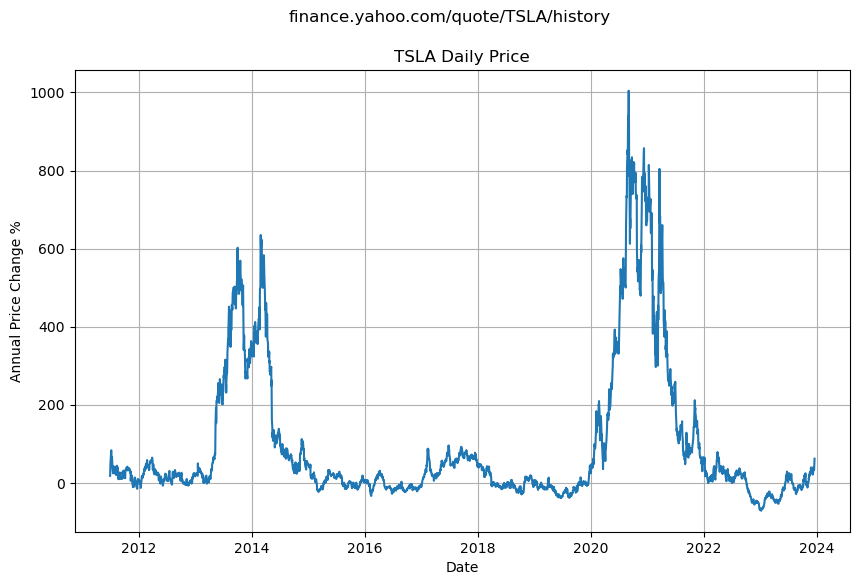

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Change'])
plt.xlabel('Date')
plt.ylabel('Annual Price Change %')
plt.suptitle('finance.yahoo.com/quote/TSLA/history')
plt.title('TSLA Daily Price')
plt.grid(True)
plt.show()

In [6]:
df['3_yr_rolling'] = df['Change'].rolling(window=252*3, min_periods=252).mean()
df.tail()

,Price,Change,3_yr_rolling
Date,,,
2023-12-11,239.740005,38.226477,99.823122
2023-12-12,237.009995,32.370841,98.852164
2023-12-13,239.289993,42.587286,97.864903
2023-12-14,251.050003,55.980123,96.949583
2023-12-15,253.500000,61.670915,95.982687


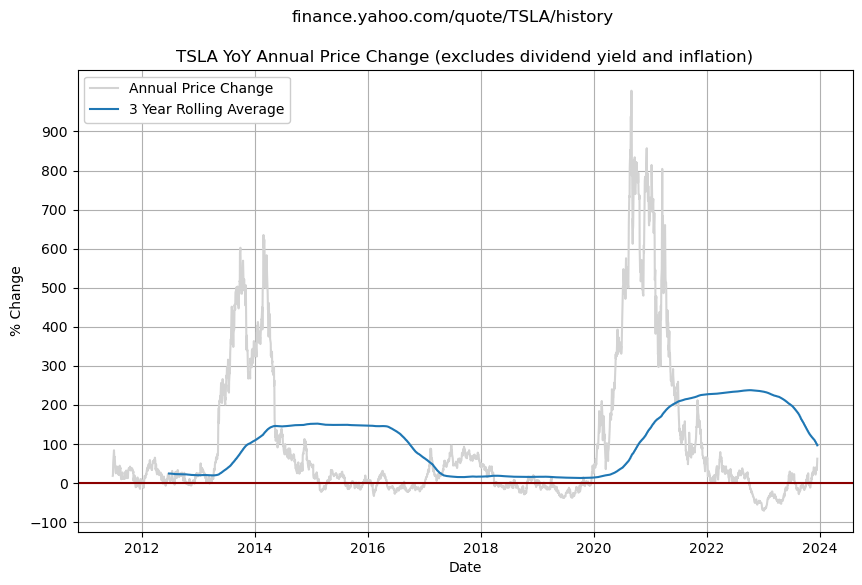

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Change'], label='Annual Price Change', color='lightgrey')
plt.plot(df.index, df['3_yr_rolling'], label='3 Year Rolling Average')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.suptitle('finance.yahoo.com/quote/TSLA/history')
plt.title('TSLA YoY Annual Price Change (excludes dividend yield and inflation)')
plt.yticks(range(-100, 1000, 100))
plt.grid(True)
plt.axhline(y=0, color='darkred')  # Add horizontal line at y=0
legend = plt.legend(loc='upper left')
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.98)
plt.show()